In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)


df = pd.read_csv("/content/Athens_meteo.csv",
                 parse_dates=['DAY'],
                 index_col="DAY")
df.head()

,T_max,T_mean,T_min,RH_max,RH_mean,RH_min,P_max,P_mean,P_min
DAY,,,,,,,,,
2012-01-01,9.400,9.500,9.400,60.600,67,49,1020.200,1026.100,1012.700
2012-01-02,8.400,8.600,8.300,63.500,82,43,1026.100,1027.600,1024.800
2012-01-03,8.700,8.800,8.500,69.900,89,47,1025.700,1026.900,1024.800
2012-01-04,10.200,10.300,10.100,77.600,92,64,1021.900,1026.000,1018.100
2012-01-05,10.500,10.700,10.400,80.800,91,66,1013.200,1018.100,1004.900


In [23]:
# Step 1: Replace '---' with NaN
df[['T_max', 'T_mean', 'T_min']] = df[['T_max', 'T_mean', 'T_min']].replace('---', np.nan)

# Step 2: Convert to float
df[['T_max', 'T_mean', 'T_min']] = df[['T_max', 'T_mean', 'T_min']].astype(float)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2012-01-01 to 2019-12-31
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   T_max    2922 non-null   float64
 1   T_mean   2922 non-null   float64
 2   T_min    2922 non-null   float64
 3   RH_max   2922 non-null   float64
 4   RH_mean  2922 non-null   int64  
 5   RH_min   2922 non-null   int64  
 6   P_max    2922 non-null   float64
 7   P_mean   2922 non-null   float64
 8   P_min    2922 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 228.3 KB


In [41]:
missing_locs = df[df['T_mean'].isna()].index
print(missing_locs)


DatetimeIndex([], dtype='datetime64[ns]', name='DAY', freq=None)


In [42]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()
df.describe()


['T_max', 'T_mean', 'T_min', 'RH_max', 'RH_mean', 'RH_min', 'P_max', 'P_mean', 'P_min']


,T_max,T_mean,T_min,RH_max,RH_mean,RH_min,P_max,P_mean,P_min
count,2922.000,2922.000,2922.000,2922.000,2922.000,2922.000,2922.000,2922.000,2922.000
mean,19.471,19.573,19.372,61.001,75.522,45.936,1015.457,1017.500,1013.360
std,7.141,7.151,7.131,12.767,12.060,12.936,6.140,6.045,6.425
min,0.800,0.900,0.700,26.300,38.000,13.000,992.300,999.400,983.400
25%,13.700,13.800,13.600,51.200,68.000,36.000,1011.400,1013.300,1009.500
50%,19.000,19.100,18.900,61.600,78.000,45.000,1014.800,1016.700,1012.900
75%,25.800,25.900,25.700,71.100,85.000,55.000,1019.300,1021.300,1017.300
max,35.300,35.500,35.200,90.100,96.000,85.000,1037.100,1039.400,1036.300


In [43]:
import plotly.express as px

# Mean Temperature Plot
fig_meantemp = px.line(df, x=df.index, y='T_mean', title='Mean Temperature Over Time')
fig_meantemp.update_layout(template='plotly', title_x=0.5, xaxis_title="Date")
fig_meantemp.show()

# Humidity Plot
fig_humidity = px.line(df, x=df.index, y='RH_mean', title='Humidity Over Time')
fig_humidity.update_layout(template='plotly', title_x=0.5, xaxis_title="Date")
fig_humidity.show()

# Mean Pressure Plot
fig_meanpressure = px.line(df, x=df.index, y='P_mean', title='Mean Pressure Over Time')
fig_meanpressure.update_layout(template='plotly', title_x=0.5, xaxis_title="Date")
fig_meanpressure.show()


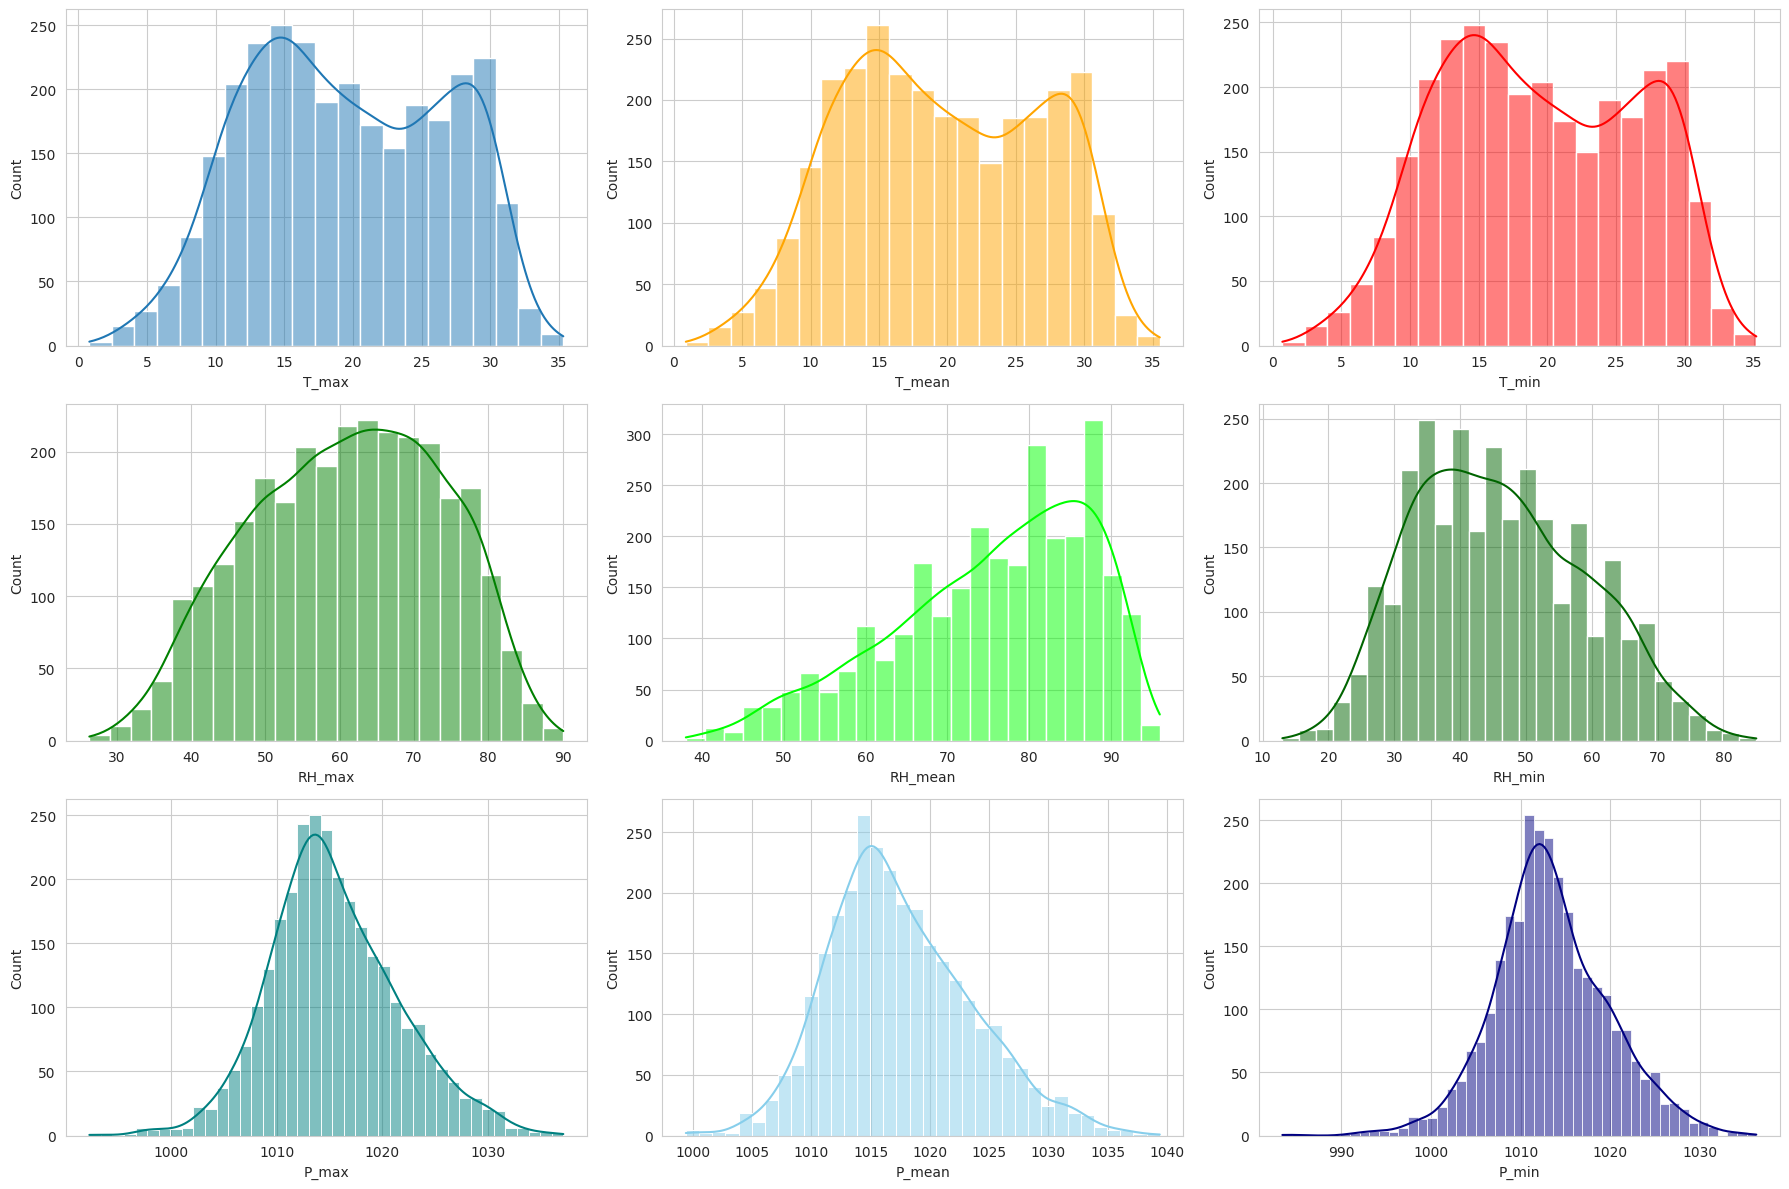

In [44]:
fig, ax = plt.subplots(3, 3, figsize=(18, 12))

# Plotting example
sns.histplot(data=df, x="T_max", ax=ax[0][0], kde=True)
sns.histplot(data=df, x="T_mean", ax=ax[0][1], kde=True, color='orange')
sns.histplot(data=df, x="T_min", ax=ax[0][2], kde=True, color='red')

sns.histplot(data=df, x="RH_max", ax=ax[1][0], kde=True, color='green')
sns.histplot(data=df, x="RH_mean", ax=ax[1][1], kde=True, color='lime')
sns.histplot(data=df, x="RH_min", ax=ax[1][2], kde=True, color='darkgreen')

sns.histplot(data=df, x="P_max", ax=ax[2][0], kde=True, color='teal')
sns.histplot(data=df, x="P_mean", ax=ax[2][1], kde=True, color='skyblue')
sns.histplot(data=df, x="P_min", ax=ax[2][2], kde=True, color='navy')

plt.tight_layout()
plt.show()


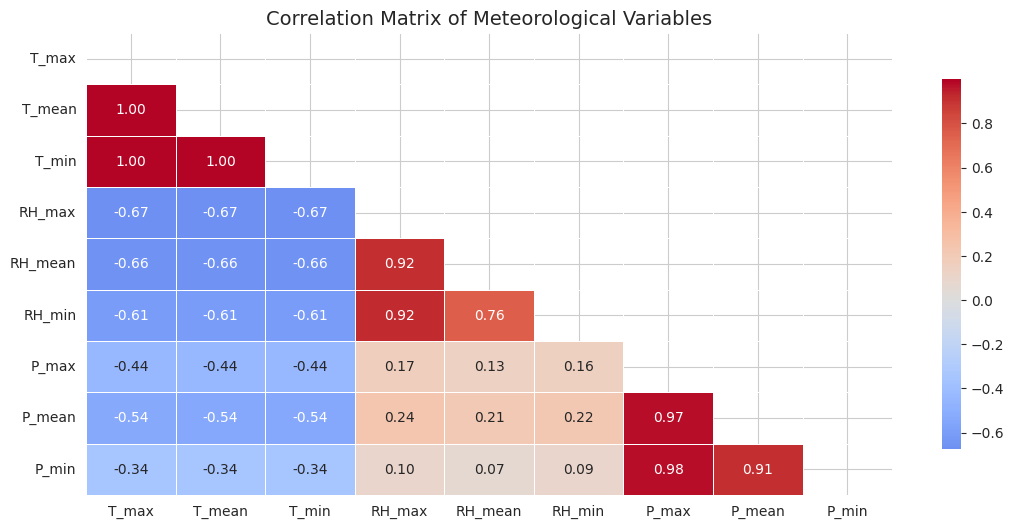

In [45]:
corr = df.select_dtypes('number').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(13, 6))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',       # Diverging colormap
    center=0,              # Set white at 0
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Meteorological Variables", fontsize=14)
plt.show()


In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
import plotly.subplots as sp

# Perform seasonal decomposition
result = seasonal_decompose(df['T_mean'], model='additive', period=365)

# Create subplots for the decomposed components
fig = sp.make_subplots(
    rows=4, cols=1, shared_xaxes=True,
    subplot_titles=['Observed', 'Trend', 'Seasonal', 'Residual']
)

# Add traces for each component
fig.add_trace(go.Scatter(x=df.index, y=result.observed, mode='lines', name='Observed'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.trend, mode='lines', name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.seasonal, mode='lines', name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.resid, mode='lines', name='Residual'), row=4, col=1)

# Update layout with the correct template
fig.update_layout(
    template='plotly',
    height=800,
    title='Decomposition of Mean Temperature',
    title_x=0.5
)

# Show the figure
fig.show()

In [47]:
df1 = df[['T_mean', 'RH_max', 'P_mean']]
df1.head()

,T_mean,RH_max,P_mean
DAY,,,
2012-01-01,9.500,60.600,1026.100
2012-01-02,8.600,63.500,1027.600
2012-01-03,8.800,69.900,1026.900
2012-01-04,10.300,77.600,1026.000
2012-01-05,10.700,80.800,1018.100


In [50]:
df1.to_csv("Athens_meteo_subset.csv")  # saves with the date index